In [1]:
import pandas as pd

df = pd.read_csv("c:/data/iris/iris.csv")
df.head()

C:\Users\user\AppData\Local\Temp\ipykernel_12892\3358537795.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


,SepalLength,SepalWidth,PetalLength,PetalWidth,Name,Species
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0
3,4.6,3.1,1.5,0.2,setosa,0
4,5.0,3.6,1.4,0.2,setosa,0


In [2]:
X = df[df.columns[0:4]]
y = df["Species"]

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=10
)

In [4]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=1)
model.fit(X_train, y_train)
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

1.0
0.9666666666666667


In [5]:
# 하이퍼 파라미터 튜닝
from sklearn.model_selection import GridSearchCV

params = {
    "n_neighbors": list(range(1, 11)),
    "algorithm": ["ball_tree", "kd_tree"],
    "weights": ["uniform", "distance"],  # 가중치
    "p": [1, 2],  # 1맨해튼, 2유클리드직선거리
}

gcv = GridSearchCV(model, params, cv=3)  # → 3회 교차검증
gcv.fit(X, y)

GridSearchCV(cv=3, estimator=KNeighborsClassifier(n_neighbors=1),
             param_grid={'algorithm': ['ball_tree', 'kd_tree'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'p': [1, 2], 'weights': ['uniform', 'distance']})

In [6]:
gcv.cv_results_["params"]

[{'algorithm': 'ball_tree', 'n_neighbors': 1, 'p': 1, 'weights': 'uniform'},
 {'algorithm': 'ball_tree', 'n_neighbors': 1, 'p': 1, 'weights': 'distance'},
 {'algorithm': 'ball_tree', 'n_neighbors': 1, 'p': 2, 'weights': 'uniform'},
 {'algorithm': 'ball_tree', 'n_neighbors': 1, 'p': 2, 'weights': 'distance'},
 {'algorithm': 'ball_tree', 'n_neighbors': 2, 'p': 1, 'weights': 'uniform'},
 {'algorithm': 'ball_tree', 'n_neighbors': 2, 'p': 1, 'weights': 'distance'},
 {'algorithm': 'ball_tree', 'n_neighbors': 2, 'p': 2, 'weights': 'uniform'},
 {'algorithm': 'ball_tree', 'n_neighbors': 2, 'p': 2, 'weights': 'distance'},
 {'algorithm': 'ball_tree', 'n_neighbors': 3, 'p': 1, 'weights': 'uniform'},
 {'algorithm': 'ball_tree', 'n_neighbors': 3, 'p': 1, 'weights': 'distance'},
 {'algorithm': 'ball_tree', 'n_neighbors': 3, 'p': 2, 'weights': 'uniform'},
 {'algorithm': 'ball_tree', 'n_neighbors': 3, 'p': 2, 'weights': 'distance'},
 {'algorithm': 'ball_tree', 'n_neighbors': 4, 'p': 1, 'weights': 'unif

In [7]:
gcv.cv_results_["params"][:5]

[{'algorithm': 'ball_tree', 'n_neighbors': 1, 'p': 1, 'weights': 'uniform'},
 {'algorithm': 'ball_tree', 'n_neighbors': 1, 'p': 1, 'weights': 'distance'},
 {'algorithm': 'ball_tree', 'n_neighbors': 1, 'p': 2, 'weights': 'uniform'},
 {'algorithm': 'ball_tree', 'n_neighbors': 1, 'p': 2, 'weights': 'distance'},
 {'algorithm': 'ball_tree', 'n_neighbors': 2, 'p': 1, 'weights': 'uniform'}]

In [8]:
scores = gcv.cv_results_["mean_test_score"]
scores

array([0.96      , 0.96      , 0.96      , 0.96      , 0.92      ,
       0.96      , 0.94666667, 0.96      , 0.96666667, 0.96666667,
       0.97333333, 0.97333333, 0.96      , 0.96666667, 0.98666667,
       0.97333333, 0.96      , 0.96      , 0.98      , 0.97333333,
       0.95333333, 0.96      , 0.97333333, 0.98666667, 0.96666667,
       0.96      , 0.97333333, 0.98      , 0.96      , 0.96      ,
       0.96666667, 0.98666667, 0.96666667, 0.96      , 0.97333333,
       0.97333333, 0.96666667, 0.96666667, 0.96666667, 0.98666667,
       0.96      , 0.96      , 0.96      , 0.96      , 0.92      ,
       0.96      , 0.94666667, 0.96      , 0.96666667, 0.96666667,
       0.97333333, 0.97333333, 0.96      , 0.96666667, 0.98666667,
       0.97333333, 0.96      , 0.96      , 0.98      , 0.97333333,
       0.95333333, 0.96      , 0.97333333, 0.98666667, 0.96666667,
       0.96      , 0.97333333, 0.98      , 0.96      , 0.96      ,
       0.96666667, 0.98666667, 0.96666667, 0.96      , 0.97333

0.9866666666666667


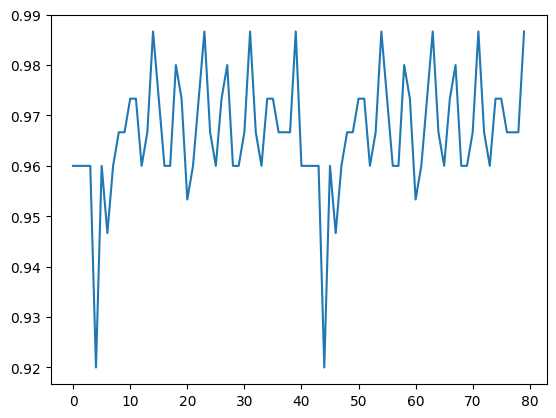

In [9]:
import matplotlib.pyplot as plt

print(max(scores))
plt.plot(scores)

In [10]:
print(gcv.best_score_)  # 최고 정확도
print(gcv.best_params_)  # 최적의 파라미터
print(gcv.best_estimator_)  # 최적의 모형

0.9866666666666667
{'algorithm': 'ball_tree', 'n_neighbors': 4, 'p': 2, 'weights': 'uniform'}
KNeighborsClassifier(algorithm='ball_tree', n_neighbors=4)


In [12]:
from sklearn.model_selection import cross_val_score
import numpy as np

model = KNeighborsClassifier(
    algorithm="ball_tree", n_neighbors=4, p=2, weights="distance"
)
result = cross_val_score(model, X, y, cv=10)
print(result)  # 교차검증 결과
print(np.mean(result))  # 교차검증 평균값
print(np.max(result))  # 교차검증 최댓값

[1.         0.93333333 1.         0.93333333 0.86666667 1.
 0.93333333 1.         1.         1.        ]
0.9666666666666666
1.0
